<a href="https://colab.research.google.com/github/nickehsani/CSE151A_DARWIN_Alzheimer-s/blob/milestone2/CSE_151A_Group_Project_Data_Preprocessing_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
darwin_df = pd.read_csv('data.csv')
darwin_df['class'] = darwin_df['class'].apply(lambda x: int(x == 'P'))

In [ ]:
print("Contains NaNs:", darwin_df.isnull().values.any())
darwin_df.describe()

Contains NaNs: False


,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174.000000
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05,0.511494
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05,0.501310
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04,0.000000
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04,0.000000
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04,1.000000
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05,1.000000
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06,1.000000


In [ ]:
darwin_tests = [darwin_df.filter(regex=str("[^\d]"+str(col)+"$|class$")) for col in range(1,26)]

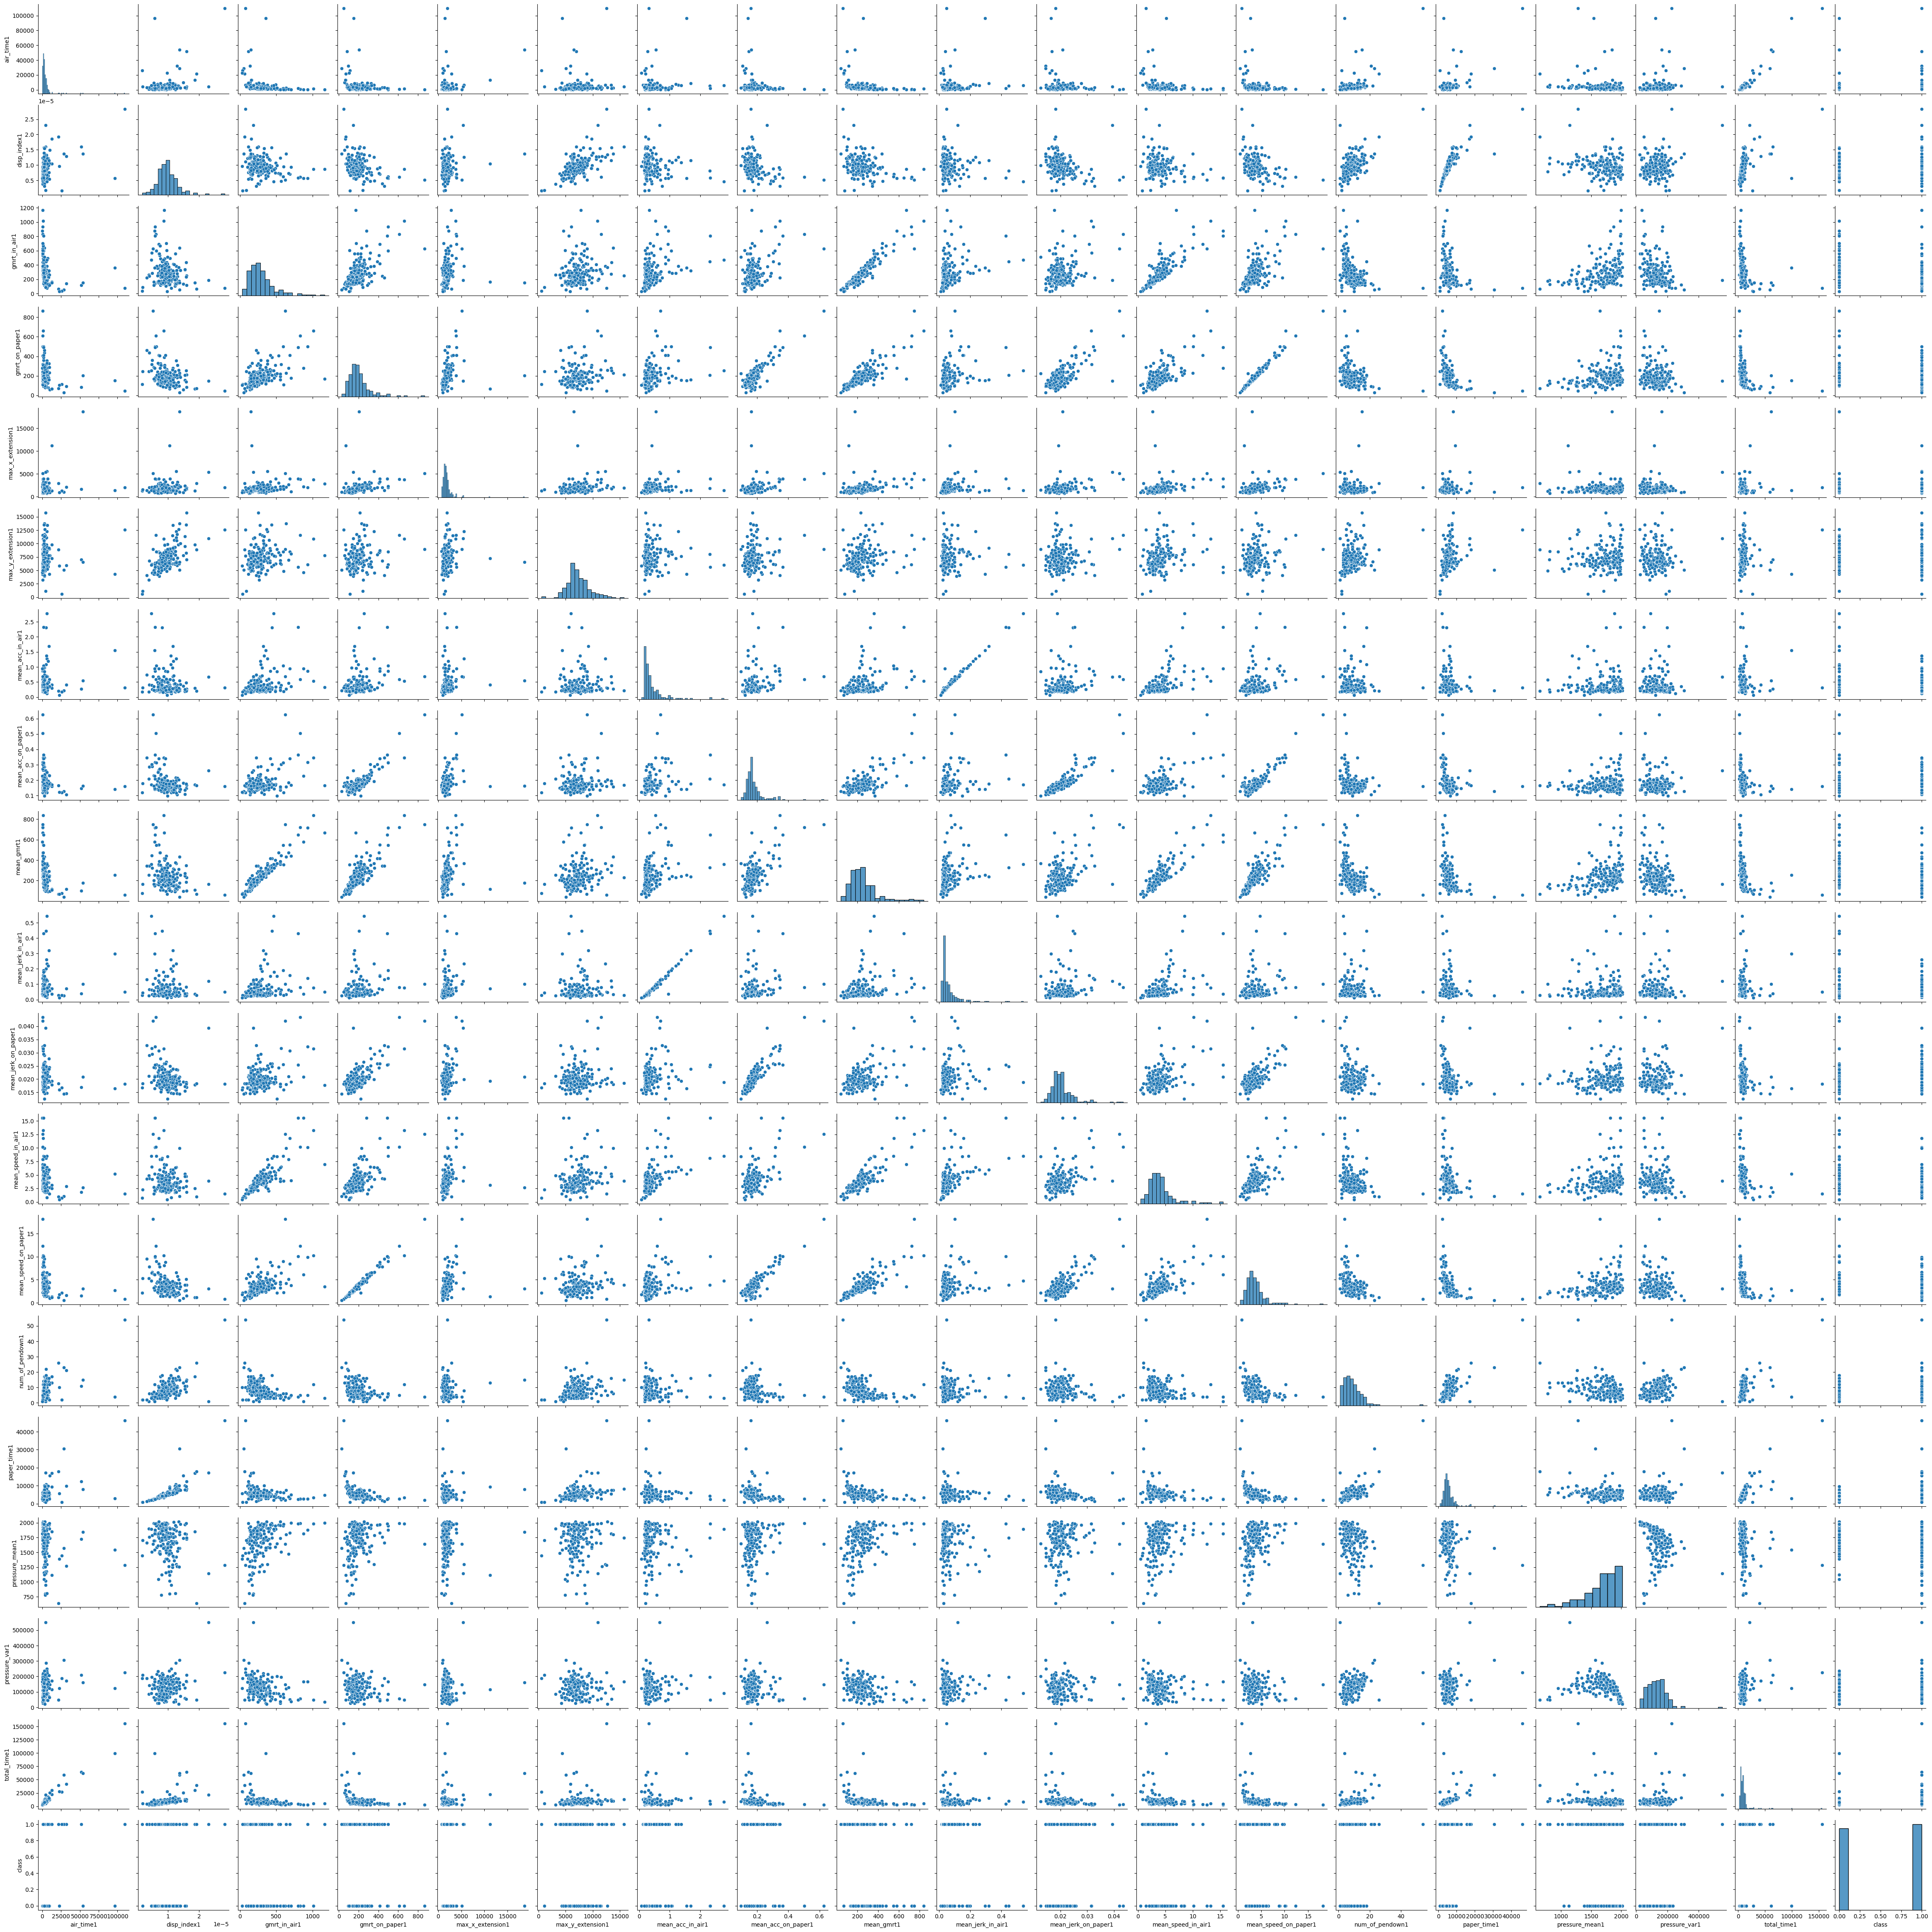

In [ ]:
sns.pairplot(darwin_tests[0])

In [ ]:
compiled_features = [s[:-1] for s in darwin_tests[0].columns[:-1]].append('')
compiled_df = pd.DataFrame()
for feature in compiled_features:
  compiled_df[feature] = darwin_df.filter(regex=str("^"+feature+"\d*$")).stack().reset_index().iloc[:,-1]

In [ ]:
sns.pairplot(compiled_df, )

,air_time,disp_index,gmrt_in_air,gmrt_on_paper,max_x_extension,max_y_extension,mean_acc_in_air,mean_acc_on_paper,mean_gmrt,mean_jerk_in_air,mean_jerk_on_paper,mean_speed_in_air,mean_speed_on_paper,num_of_pendown,paper_time,pressure_mean,pressure_var,total_time,class
count,4.350000e+03,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4.350000e+03,174.000000
mean,3.700456e+04,0.000015,232.886526,169.746235,3755.384828,6349.064138,0.516353,0.146823,201.316381,0.087870,0.017180,3.547228,2.836107,13.845747,11575.742529,1720.098957,139563.662578,4.858030e+04,0.511494
std,4.314213e+05,0.000014,184.643765,97.841089,3693.148427,4467.493121,0.556693,0.043651,117.821874,0.111144,0.004365,2.217492,1.576766,20.351100,13326.678437,319.743613,86692.459318,4.334415e+05,0.501310
min,3.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.067748,0.000000,12.629373,0.010971,0.000000,0.353844,0.000000,0.000000,0.000000,0.000000,0.000000,2.150000e+02,0.000000
25%,1.640000e+03,0.000006,126.657744,99.810928,1184.000000,3100.000000,0.218417,0.121876,125.999194,0.028165,0.014339,2.093049,1.704094,3.000000,3471.250000,1599.908863,72321.824323,6.192500e+03,0.000000
50%,4.160000e+03,0.000010,188.144241,155.999508,1975.000000,4849.000000,0.310152,0.145068,176.315399,0.044863,0.017355,3.020192,2.549128,6.000000,6275.000000,1822.569165,131211.064850,1.165000e+04,1.000000
75%,1.316875e+04,0.000018,283.121163,215.304442,5040.750000,8714.000000,0.583860,0.170223,247.262657,0.100915,0.019845,4.394935,3.602162,14.000000,15022.500000,1946.080390,194209.293400,2.986125e+04,1.000000
max,9.170100e+06,0.000093,3312.262523,894.436629,18602.000000,20172.000000,7.445749,0.627350,1799.166544,1.471478,0.043455,25.740376,18.187079,209.000000,139575.000000,2046.621656,576735.949200,9.206165e+06,1.000000


<Axes: >

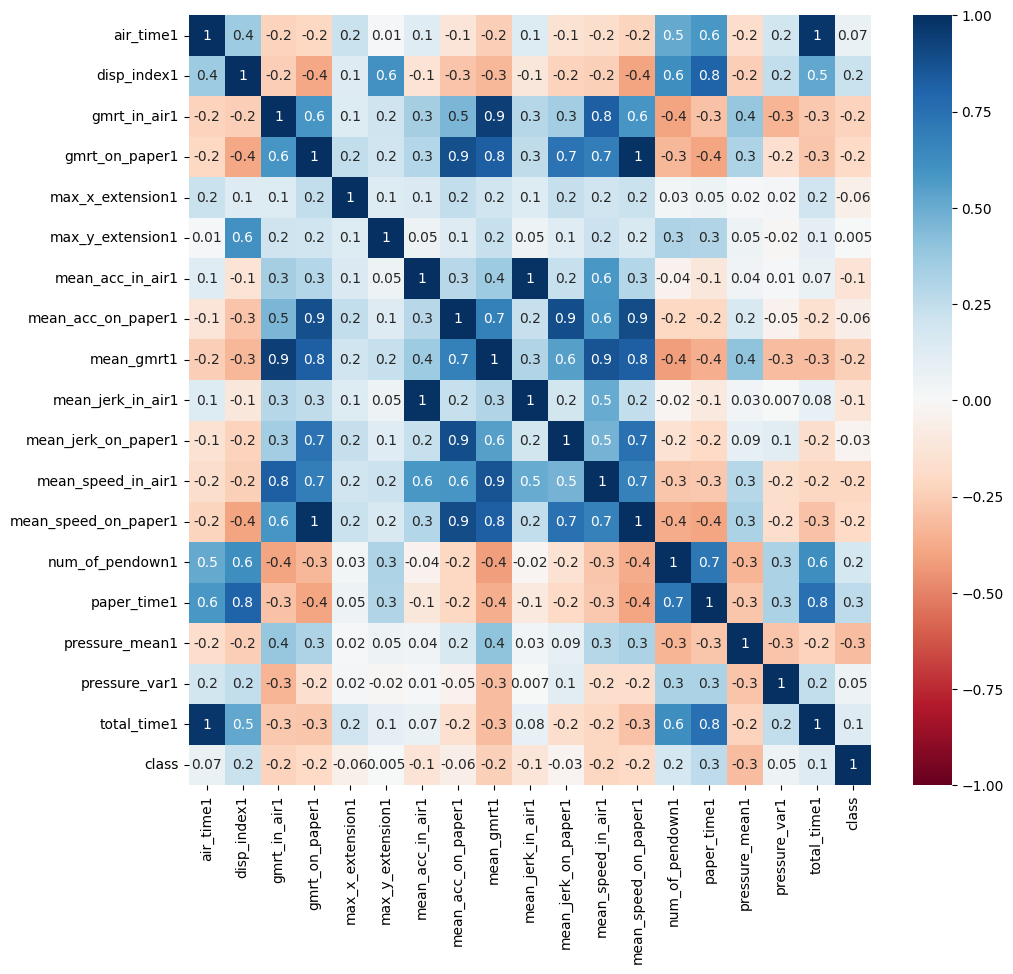

In [ ]:
corr = darwin_tests[0].corr()
plt.figure(figsize=(11, 10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, fmt='.1g', cmap= 'RdBu')